In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/divvy-trips-april-2020/Divvy Trips-April 2020.csv


# Divvy Trip Analysis: April 2020
This analysis explores ridership patterns for Divvy bike sharing during April 2020. We'll investigate:

* **Peak Day:** Which weekday saw the highest number of rides?
* **Popular Start Stations:** What are the 10 most frequented starting stations for Divvy trips?
* **Least Used Start Stations:** On the other hand, which stations were the least popular for starting trips?
* **Frequent End Stations:** Similar to start stations, what are the top 10 destinations for ending Divvy rides?
* **Least Used End Stations:** Which stations were the least popular for ending trips?
* **Rider Type:** Do annual members or casual riders use Divvy more extensively?
* **Member & Casual Riders Start Stations:** For member & casual riders, which start stations were most commonly used for starting trips?
* **Member & Casual Riders End Stations:** For member & casual riders, which end stations were most commonly used for ending trips?

In [2]:
df = pd.read_csv('/kaggle/input/divvy-trips-april-2020/Divvy Trips-April 2020.csv')
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,4/26/2020 17:45,4/26/2020 18:12,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,4/17/2020 17:08,4/17/2020 17:17,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,4/1/2020 17:54,4/1/2020 18:08,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,4/7/2020 12:50,4/7/2020 13:02,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,4/18/2020 10:22,4/18/2020 11:15,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


**Converted the 'started_at' and 'ended_at' columns to datetime format using pd.to_datetime.**

In [3]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id               int64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

# Peak Days
Based on the chart, Sundays appear to be the most popular day for Divvy rides, followed by Saturdays. This suggests that ridership is highest on weekends.

<Axes: title={'center': 'Peak Days'}>

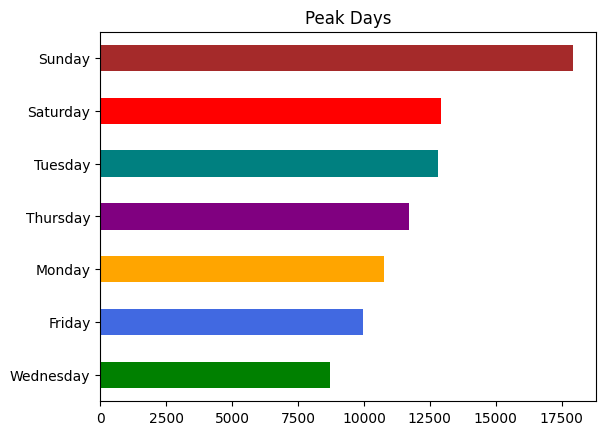

In [4]:
date = df['started_at'].dt.date
date = pd.to_datetime(date)
df['day_each_ride_started'] = date.dt.strftime('%A')

df1 = df.groupby('day_each_ride_started').count()
df1 = df1.sort_values(by = 'ride_id')
df1['ride_id'].plot.barh(title = 'Peak Days', ylabel = '', color = ['green', 'royalblue', 'orange', 'purple', 'teal', 'red', 'brown'])

# Popular Start Stations
Based on the chart, it appears that Clark St & Elm St is the most popular starting point for the rides.

<Axes: title={'center': 'Popular Start Stations'}>

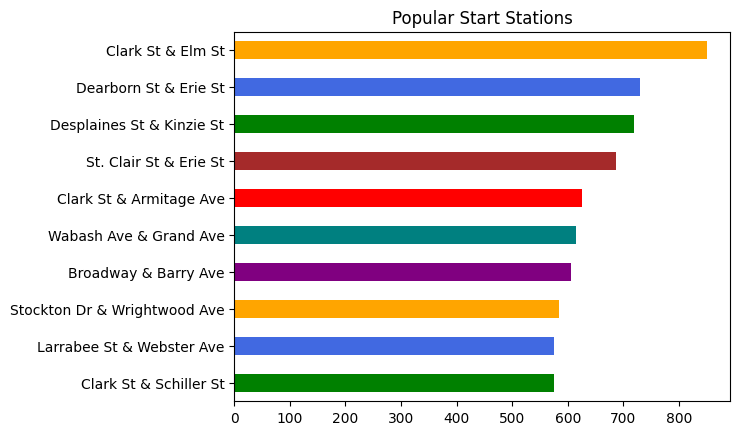

In [5]:
df2 = df.groupby('start_station_name').count()
df2 = df2.sort_values(by = 'ride_id', ascending = False)
df2 = df2.head(10)
df2 = df2.sort_values(by = 'ride_id')

df2['ride_id'].plot.barh(title = 'Popular Start Stations', ylabel = '', color = ['green', 'royalblue', 'orange', 'purple', 'teal', 'red', 'brown'])

# Least Used Start Stations
The chart reveals start stations that were used less frequently, with some stations having only 1 ride throughout the entire month.

<Axes: title={'center': 'Least Used Start Stations'}>

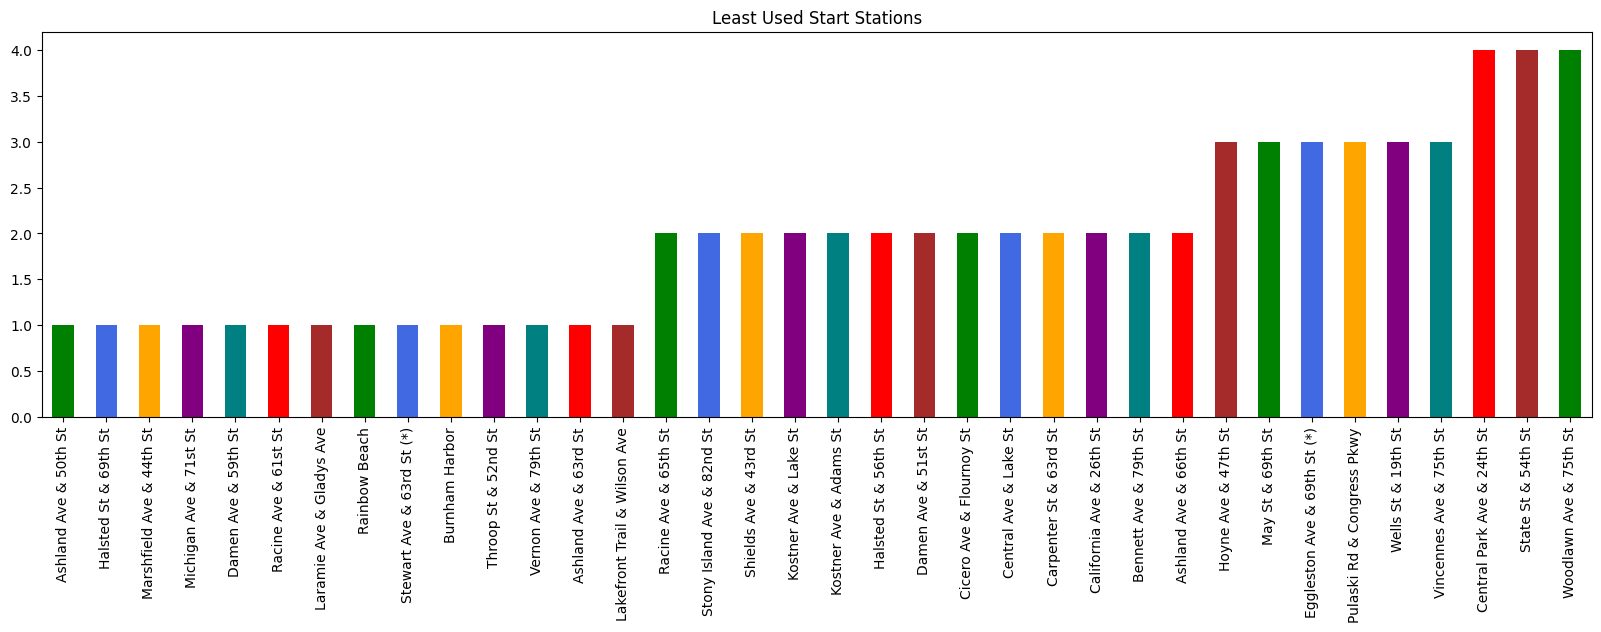

In [6]:
df3 = df.groupby('start_station_name').count()
df3 = df3[df3['ride_id'] < 5]
df3 = df3.sort_values('ride_id')

df3['ride_id'].plot.bar(title = 'Least Used Start Stations', xlabel = '', color = ['green', 'royalblue', 'orange', 'purple', 'teal', 'red', 'brown'], figsize = (20, 5))

# Frequent End Stations
Similar to start stations, examining the chart, it appears that Clark St & Elm St is also a popular destination for ending rides.

<Axes: title={'center': 'Frequent End Stations'}>

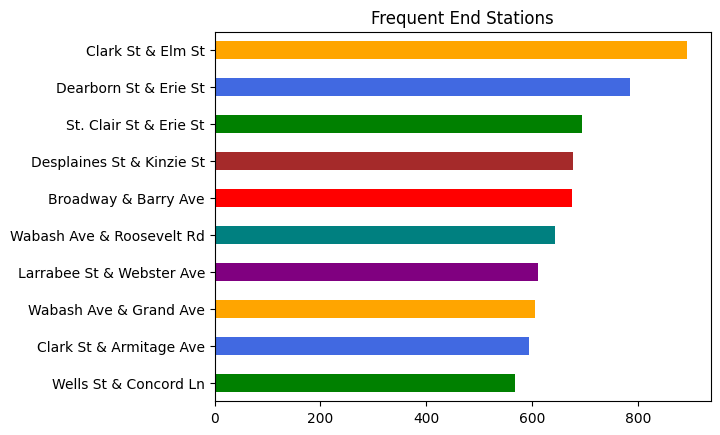

In [7]:
df4 = df.groupby('end_station_name').count()
df4 = df4.sort_values(by = 'ride_id', ascending = False)
df4 = df4.head(10)
df4 = df4.sort_values(by = 'ride_id')

df4['ride_id'].plot.barh(title = 'Frequent End Stations', ylabel = '', color = ['green', 'royalblue', 'orange', 'purple', 'teal', 'red', 'brown'])

# Least Used End Stations
Just as we saw with start stations, the chart reveals stations that were frequented less often, with some having as few as only 1 ride end throughout the entire month.

<Axes: title={'center': 'Least Used End Stations'}>

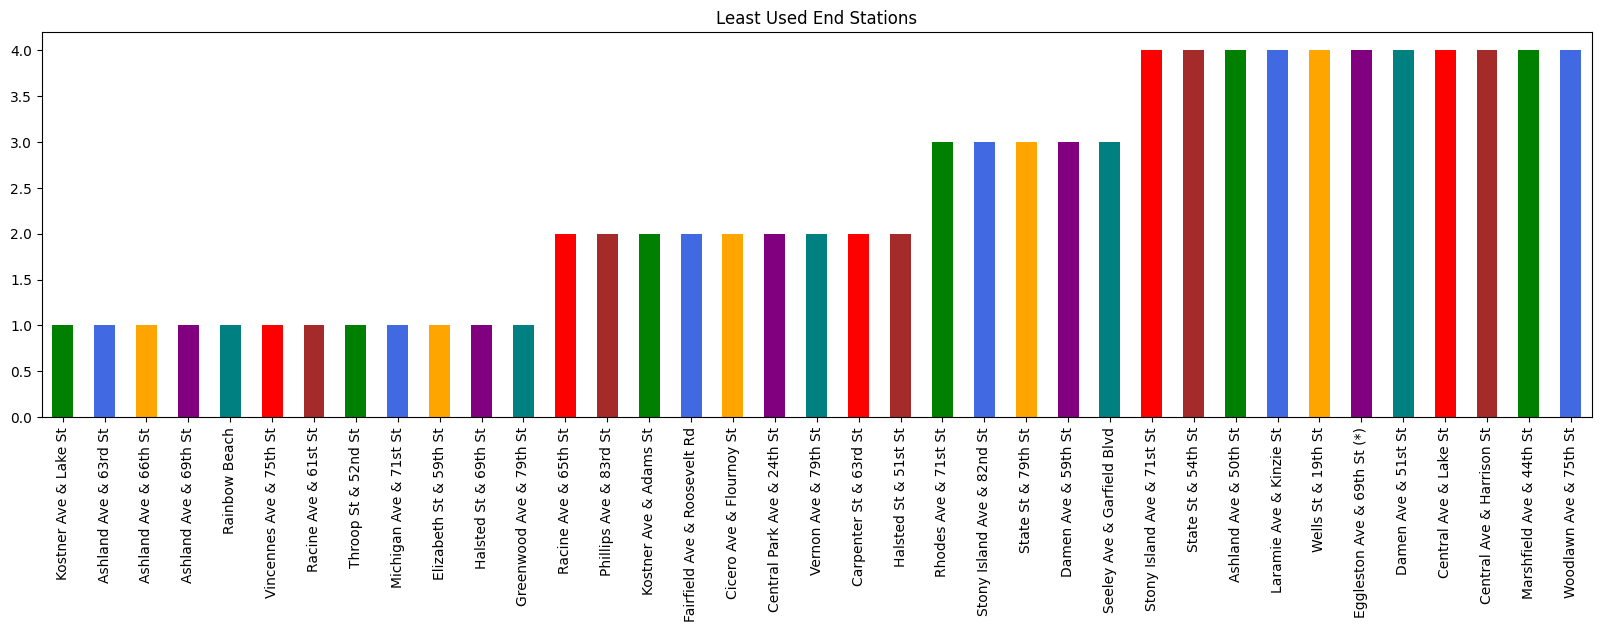

In [8]:
df5 = df.groupby('end_station_name').count()
df5 = df5[df5['ride_id'] < 5]
df5 = df5.sort_values('ride_id')

df5['ride_id'].plot.bar(title = 'Least Used End Stations', xlabel = '', color = ['green', 'royalblue', 'orange', 'purple', 'teal', 'red', 'brown'], figsize = (20, 5))

# Rider Type
This section explores how ridership patterns differ between member and casual riders. Examining the chart, we can see that member riders appear to take significantly more rides than casual riders this month. In fact, member riders take roughly twice the number of trips compared to casual riders.

<Axes: title={'center': 'Rider Type'}>

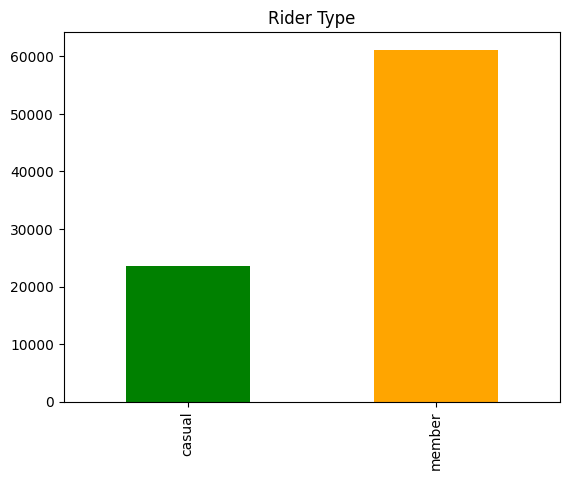

In [9]:
df6 = df.groupby(['member_casual']).count()
df6['ride_id'].plot.bar(title = 'Rider Type', xlabel = '', color = ['green', 'orange'])

# Member & Casual Riders Start Stations
The chart reveals that Clark St & Elm St is the clear favorite for both rider types. However, for members specifically, St. Clair St & Erie St appears to be a close second in popularity.

<Axes: title={'center': 'Popular Start Stations (Memeber Riders)'}>

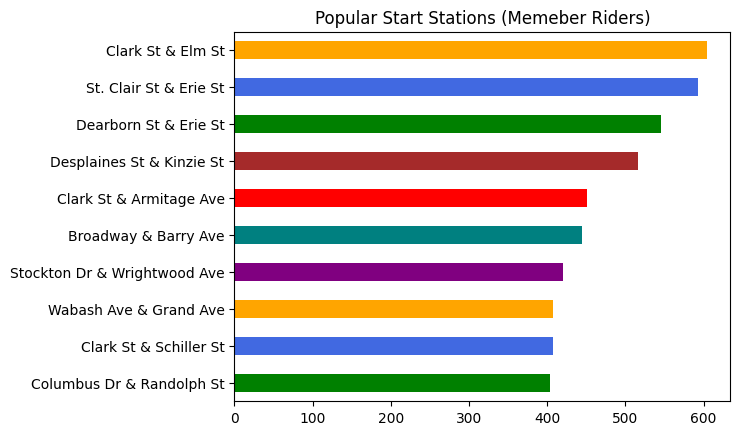

In [10]:
df7 = df
df7 = df7[df7['member_casual'] == 'member']
df7 = df7.groupby(by = 'start_station_name').count()
df7 = df7.sort_values(by = 'ride_id', ascending = False)
df7 = df7.head(10)
df7 = df7.sort_values(by = 'ride_id', ascending = True)

df7['ride_id'].plot.barh(title = 'Popular Start Stations (Memeber Riders)', ylabel = '', color = ['green', 'royalblue', 'orange', 'purple', 'teal', 'red', 'brown'])

<Axes: title={'center': 'Popular Start Stations (Casual Riders)'}>

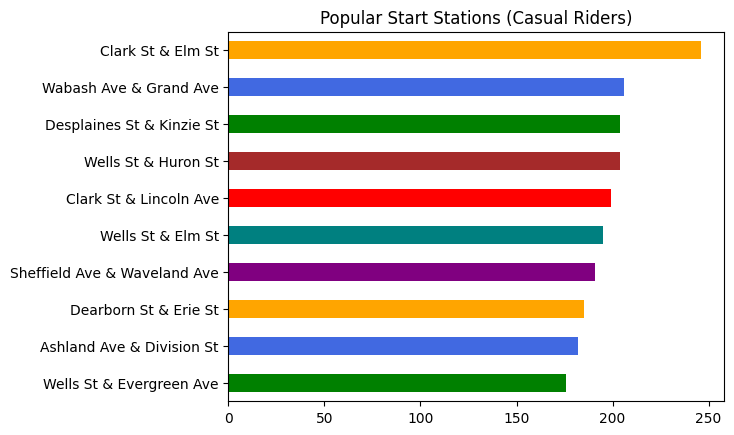

In [11]:
df8 = df
df8 = df8[df8['member_casual'] == 'casual']
df8 = df8.groupby(by = 'start_station_name').count()
df8 = df8.sort_values(by = 'ride_id', ascending = False)
df8 = df8.head(10)
df8 = df8.sort_values(by = 'ride_id', ascending = True)

df8['ride_id'].plot.barh(title = 'Popular Start Stations (Casual Riders)', ylabel = '', color = ['green', 'royalblue', 'orange', 'purple', 'teal', 'red', 'brown'])

# Member & Casual Riders End Stations
Once again, Clark St & Elm St emerges as the top choice for both rider types. Interestingly, for members, St. Clair St & Erie St appears to be a strong contender for second place, mirroring the pattern observed at start stations. However, casual riders seem to favor a different location, with Dearborn St & Erie St taking the second-place spot for ending their rides.

<Axes: title={'center': 'Popular End Stations (Member Riders)'}>

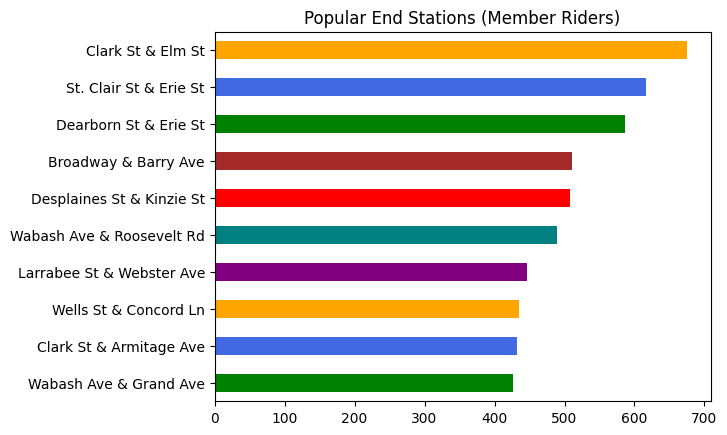

In [12]:
df9 = df
df9 = df9[df9['member_casual'] == 'member']
df9 = df9.groupby(by = 'end_station_name').count()
df9 = df9.sort_values(by = 'ride_id', ascending = False)
df9 = df9.head(10)
df9 = df9.sort_values(by = 'ride_id', ascending = True)

df9['ride_id'].plot.barh(title = 'Popular End Stations (Member Riders)', ylabel = '', color = ['green', 'royalblue', 'orange', 'purple', 'teal', 'red', 'brown'])

<Axes: title={'center': 'Popular End Stations (Casual Riders)'}>

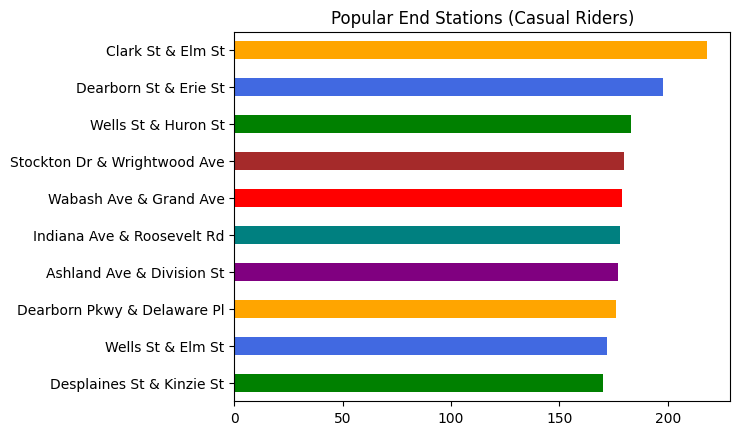

In [13]:
df10 = df
df10 = df10[df10['member_casual'] == 'casual']
df10 = df10.groupby(by = 'end_station_name').count()
df10 = df10.sort_values(by = 'ride_id', ascending = False)
df10 = df10.head(10)
df10 = df10.sort_values(by = 'ride_id', ascending = True)

df10['ride_id'].plot.barh(title = 'Popular End Stations (Casual Riders)', ylabel = '', color = ['green', 'royalblue', 'orange', 'purple', 'teal', 'red', 'brown'])

# Conclusion
This analysis provided valuable insights into Divvy ridership patterns in Chicago during April 2020. We observed that weekends, particularly Sundays, saw the highest number of rides.  Among stations, Clark St & Elm St emerged as a clear favorite for both starting and ending trips. Interestingly, member riders took significantly more rides than casual riders, and their preferred stations differed slightly, with St. Clair St & Erie St being a popular second choice for member starting and ending trips.  These findings offer valuable information for understanding ridership patterns and potentially optimizing station placement or service offerings to better serve Divvy users.